In [76]:
pwd

'/Users/surajpawar/Desktop/Machine learning algorithms_sklearn'

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [78]:
pd.read_csv("/Users/surajpawar/Desktop/Machine learning algorithms_sklearn/magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [79]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/Users/surajpawar/Desktop/Machine learning algorithms_sklearn/magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [80]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [81]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


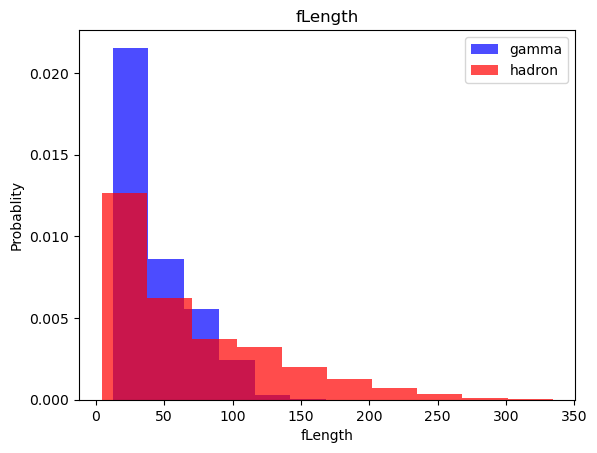

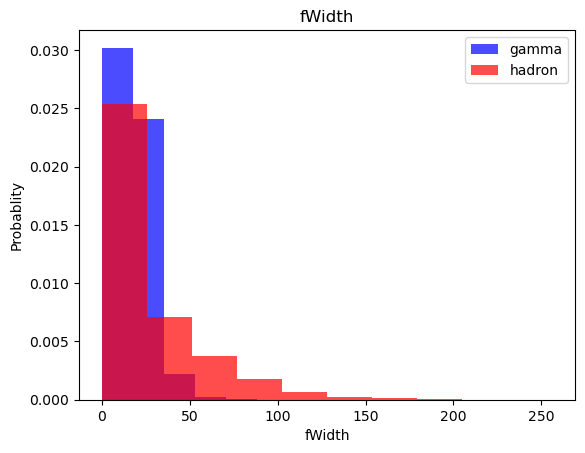

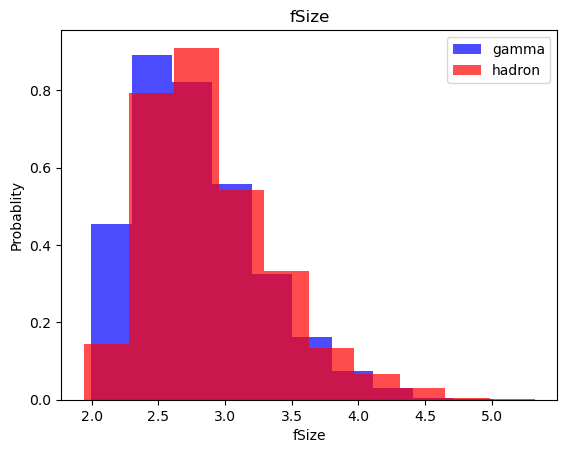

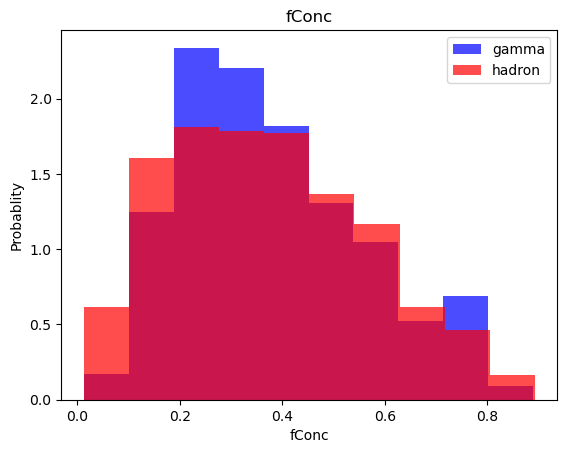

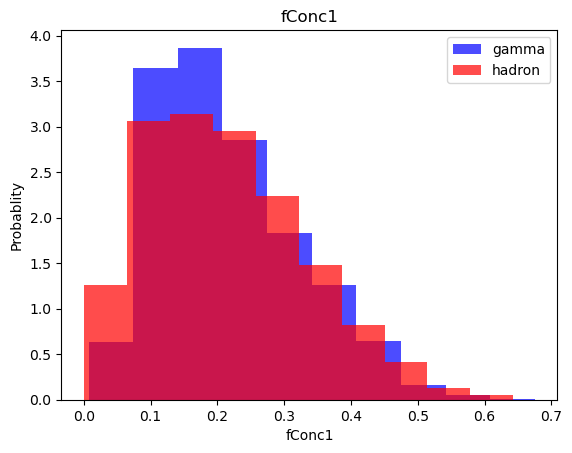

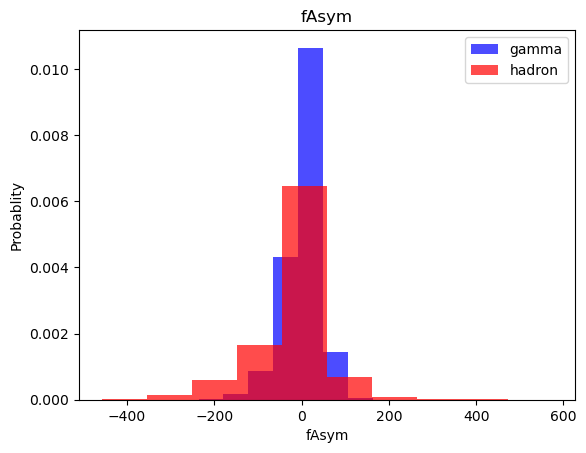

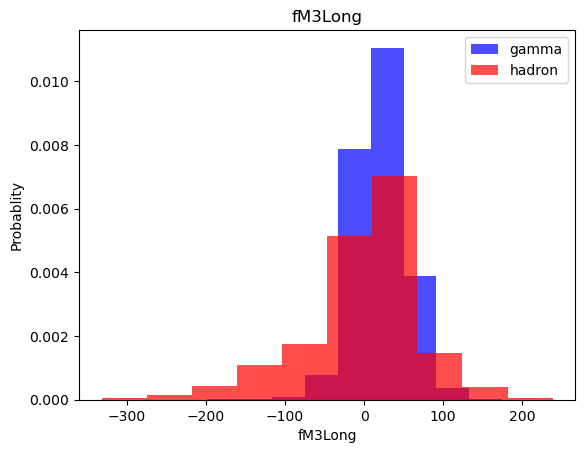

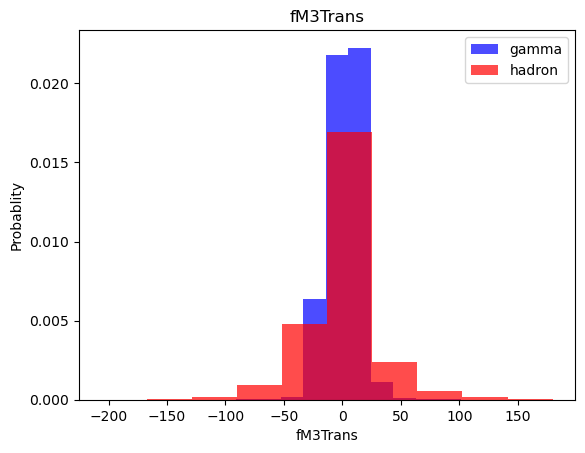

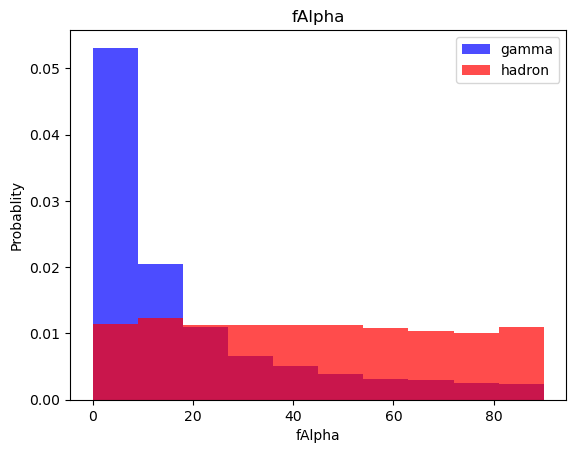

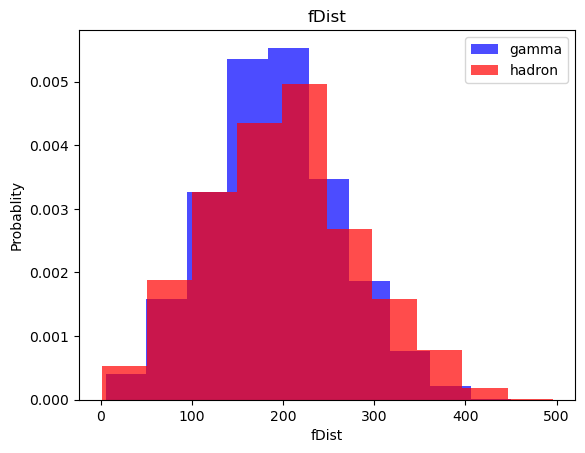

In [82]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"]==0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probablity")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [95]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [84]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1,1))))
    
    return data, X, y

In [96]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

In [ ]:
#kNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [104]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = knn_model.predict(X_test)

In [98]:
y_pred 

array([0, 1, 1, ..., 1, 1, 1])

In [99]:
y_test

array([0, 0, 1, ..., 1, 1, 1])

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1333
           1       0.86      0.89      0.87      2471

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804

